# Keras 实战

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
print('tf    version: {}'.format(tf.__version__) )
print('keras version: {}'.format(keras.__version__) )

tf    version: 1.14.0
keras version: 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

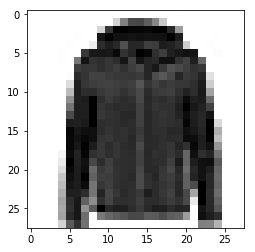

In [4]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.show()

show_single_image(x_train[0])

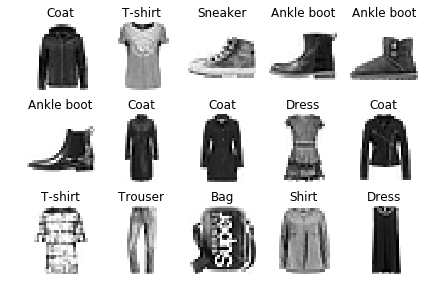

In [5]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    
    plt.figure(figsize = (n_cols *1.4, n_rows*1.6))
    
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap='binary',
                      interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 
              'Coat', 'Sandal', 'Shirt', 'Sneaker', 
              'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)

### tf.keras.Sequential
  堆叠layer

In [26]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28,28]))
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))


model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])

# softmax 将向量变成概率分布

#sparse.  y -> index 用 sparse_categorical_crossentropy
# y -> onehot 就用categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = keras.optimizers.SGD(0.0005),
             metrics=['accuracy'])



model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_22 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
%%time
history = model.fit(x_train, y_train, epochs=10, 
         validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 57us/sample - loss: 1.8373 - acc: 0.6707 - val_loss: 0.7323 - val_acc: 0.7360
Epoch 2/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.6800 - acc: 0.7423 - val_loss: 0.6525 - val_acc: 0.7582
Epoch 3/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.6071 - acc: 0.7673 - val_loss: 0.6048 - val_acc: 0.7770
Epoch 4/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.5576 - acc: 0.7903 - val_loss: 0.5734 - val_acc: 0.8010
Epoch 5/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.5151 - acc: 0.8106 - val_loss: 0.5392 - val_acc: 0.8170
Epoch 6/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.4836 - acc: 0.8235 - val_loss: 0.5084 - val_acc: 0.8322
Epoch 7/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.4558 - acc: 0.8326 - val_loss: 0.4

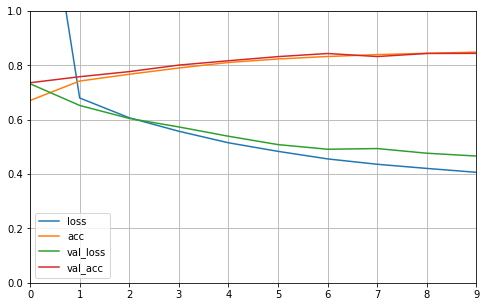

In [28]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
    
plot_learning_curves(history)